In [3]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

In [4]:
torch.ones(1)

tensor([1.])

In [5]:
train_data = MNIST(root='../../data/', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='../../data/', train=False, download=True, transform=ToTensor())

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

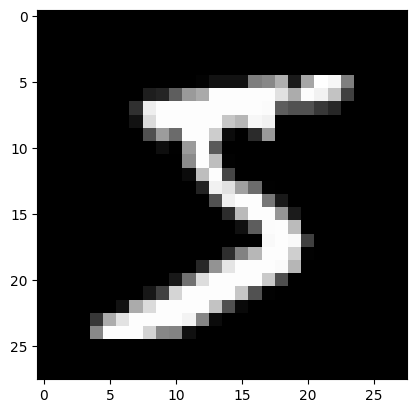

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [8]:
plt.imshow(train_data.data[0], cmap='gray')
plt.show()
train_data.data[0]

In [9]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)  # 60000개의 데이터를 32개씩 묶음
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)  # 60000개의 데이터를 32개씩 묶음

next(iter(train_loader))[0].shape

torch.Size([32, 1, 28, 28])

In [ ]:
# fmt: off
model = nn.Sequential(
    nn.Linear(784, 64), 
    nn.ReLU(), 
    nn.Linear(64, 32), 
    nn.ReLU(), 
    nn.Linear(32, 10)
)
# fmt: on
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=64, bias=True)
  (2): ReLU()
  (3): Linear(in_features=64, out_features=32, bias=True)
  (4): ReLU()
  (5): Linear(in_features=32, out_features=10, bias=True)
)

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [12]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=64, bias=True)
  (2): ReLU()
  (3): Linear(in_features=64, out_features=32, bias=True)
  (4): ReLU()
  (5): Linear(in_features=32, out_features=10, bias=True)
)

In [23]:
from torch.optim.adam import Adam

optimizer = Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()  # 분류 모델의 손실
epochs = 20

loss_list = []

for _ in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()  # 기울기 초기화
        images = torch.reshape(images, (-1, 784))
        images = images.to(device)
        # images = images.view(-1, 28 * 28)
        pred = model(images)
        loss = criterion(pred, labels.to(device))
        loss_list.append(loss.item())
        # 역전파
        loss.backward()
        optimizer.step()

    print('손실값 : ', loss)

손실값 :  tensor(0.0946, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.1823, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0833, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0390, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0242, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0190, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0421, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0221, device='cuda:0', grad_fn=<NllLossBackward0>)
손실값 :  tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackwar

In [24]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0126, -0.0186, -0.0017,  ..., -0.0357, -0.0162, -0.0263],
         [ 0.0165,  0.0128,  0.0336,  ...,  0.0313,  0.0276, -0.0259],
         [-0.0177,  0.0225, -0.0067,  ..., -0.0250, -0.0083,  0.0337],
         ...,
         [-0.0050, -0.0050,  0.0149,  ...,  0.0040, -0.0348, -0.0119],
         [-0.0315, -0.0277, -0.0056,  ...,  0.0263, -0.0223,  0.0214],
         [ 0.0096,  0.0210,  0.0219,  ...,  0.0177, -0.0011,  0.0314]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.1526, -0.0533,  0.2632,  0.1857, -0.2777,  0.1796,  0.0506, -0.0599,
          0.0312, -0.0763,  0.1148,  0.0008,  0.1578, -0.1403, -0.4499,  0.1589,
          0.0634,  0.0159, -0.1293,  0.1955,  0.4099, -0.1805,  0.2253,  0.0773,
         -0.1063, -0.0513,  0.1316, -0.2293, -0.3349,  0.2070,  0.3583,  0.0710,
         -0.1299,  0.3757, -0.0766,  0.0217,  0.3424, -0.1543,  0.2760,  0.1760,
          0.2966,  0.3980, -0.0405,  0.0094, -0.0751, -0.0881,

In [32]:
model.eval()

total = 0
correct = 0

with torch.no_grad():
    for data, label in test_loader:
        data = torch.reshape(data, (-1, 784))
        data = data.to(device)
        pred = model(data)

        label = label.to(device)

        _, pred_result = torch.max(pred, 1)

        print(pred_result)
        print(label)

        correct += (pred_result == label).sum().item()
        total += label.size(0)

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
tensor([9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2,
        5, 4, 7, 6, 4, 9, 0, 5], device='cuda:0')
tensor([1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5,

In [33]:
correct / total

0.9736

In [27]:
torch.max(torch.tensor([[1, 2, 3, 4, 5]]), 1)

torch.return_types.max(
values=tensor([5]),
indices=tensor([4]))

In [29]:
(pred_result == label).sum() / 32

tensor(1., device='cuda:0')

In [30]:
label.size()

torch.Size([32])

In [9]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc1_act = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc2_act = nn.ReLU()
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        out = self.fc1(x)
        out = self.fc1_act(out)
        out = self.fc2(out)
        out = self.fc2_act(out)
        out = self.fc3(out)

        return out


model_1 = LinearModel()
model_1

LinearModel(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc1_act): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc2_act): ReLU()
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # 회귀 평균 ** 2 오차
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 1e-3 # 0.001 ~ 0.003
epochs = 10

loss_list = []
for _ in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()  # 기울기 초기화
        # images = images.view(-1, 28 * 28)
        pred = model(images)
        loss = criterion(pred, labels)
        loss_list.append(loss.item())
        print('손실값 : ', loss)
        # 역전파
        loss.backward()
        optimizer.step()


손실값 :  tensor(2.3134, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.2913, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.2845, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.3018, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.2691, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.2593, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.2335, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.2259, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.2234, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.1684, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.1738, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.1491, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.1361, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.1499, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.0885, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.1122, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.1126, grad_fn=<NllLossBackward0>)
손실값 :  tensor(1.9486, grad_fn=<NllLossBackward0>)
손실값 :  tensor(1.9992, grad_fn=<NllLossBackward0>)
손실값 :  tensor(2.0321, grad_fn=<NllLossBackward0>)
